# PART I

## Some Imports

In [26]:
import numpy as np
import warnings
import matplotlib.pyplot as plt

from keras.datasets import mnist

warnings.filterwarnings('ignore')

In [27]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

idx = np.random.permutation(len(X_train))  # Get a portion of the data with random
X_train_subset = X_train[idx][:1000]

In [28]:
print('MNIST Dataset Shape:\n')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('Y_test:  ' + str(y_test.shape))
print('X_train_subset: ' + str(X_train_subset.shape))

MNIST Dataset Shape:

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
X_train_subset: (1000, 28, 28)


In [29]:
# from sklearn.datasets import load_digits, load_iris
# data = load_digits()
# data = load_iris()
# X = data.data
# y = data.target

### For an images has 28x28 pixels = 784px. So reshape 2 dimension.

In [30]:
X_train_subset = X_train_subset.reshape(1000, 784)
X_train_subset = X_train_subset.astype('float32')  # Change integers to 32-bit floating point numbers
print("Training matrix shape", X_train_subset.shape)

Training matrix shape (1000, 784)


In [31]:
def transform(components, mean, X):
    # projects data
    X = X - mean
    return np.dot(X, components.T)


def pca(X_train_subset, n_components=4):
    X = X_train_subset  # Get data

    mean = np.mean(X, axis=0)  # mean centering
    X = X - mean

    cov = np.cov(X.T)  # covariance, functions needs samples as columns

    eigenvectors, eigenvalues = np.linalg.eig(cov)  # eigenvectors, eigenvalues
    eigenvectors = eigenvectors.T  # eigenvectors v = [:, i] column vector, transpose this for easier calculations

    idxs = np.argsort(eigenvalues)[::-1]  # sort eigenvectors
    eigenvalues = eigenvalues[idxs]
    eigenvectors = eigenvectors[idxs]

    components = eigenvectors[:n_components]

    X_projected = transform(components, mean, X)  # Project the data onto the 4 primary principal components

    return mean, eigenvalues, X_projected

In [32]:
mean, weights, vectors = pca(X_train_subset)

print("Shape of X:", X_train_subset.shape)
print("Shape of transformed X:", vectors.shape)

Shape of X: (1000, 784)
Shape of transformed X: (1000, 4)


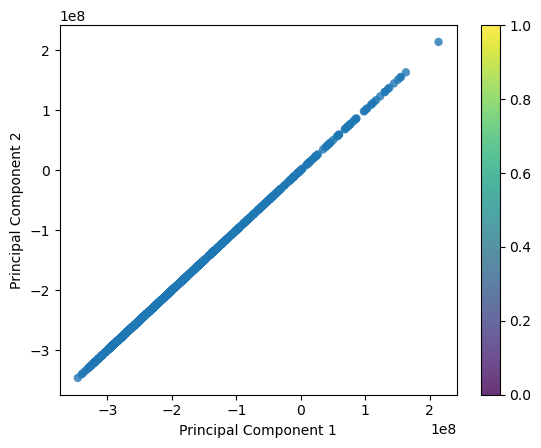

In [33]:
x1 = vectors[:, 0]
x2 = vectors[:, 1]
plt.scatter(x1, x2, edgecolor="none", alpha=0.8)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

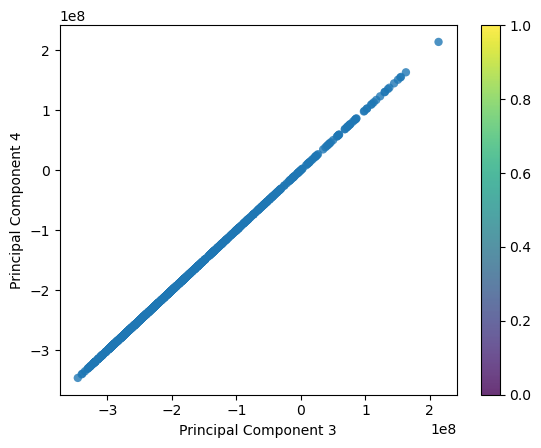

In [34]:
x3 = vectors[:, 2]
x4 = vectors[:, 3]
plt.scatter(x3, x4, edgecolor="none", alpha=0.8)
plt.xlabel("Principal Component 3")
plt.ylabel("Principal Component 4")
plt.colorbar()
plt.show()